In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

(4073, 4)


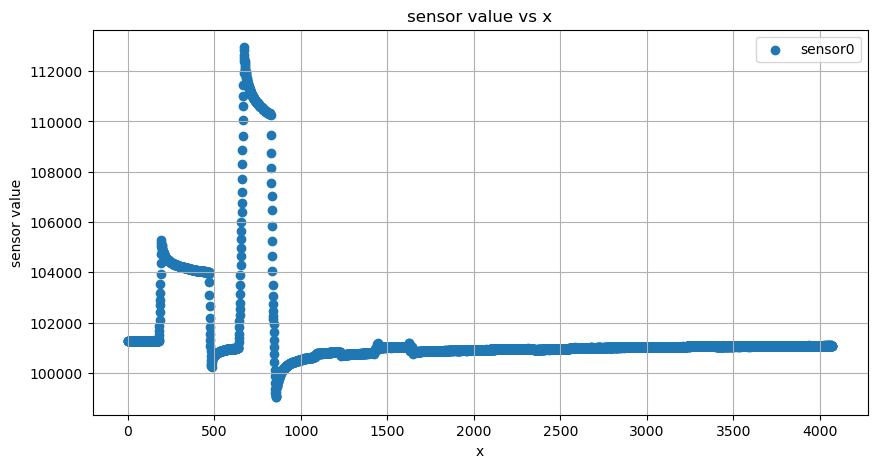

In [12]:
df_t0 = pd.read_csv('../tip1\Cali.csv')
# df_t0 = pd.read_csv('../tip1\zv1_zd5_t8_20230622_181736.csv')

print(df_t0.shape)

# Plot the data
plt.figure(figsize=(10,5))
plt.scatter(df_t0.index, df_t0['Sensor_0'], label='sensor0')
# plt.scatter(df_t0.index, df_t0['Sensor_1'], label='sensor1')
# plt.scatter(df_t0.index, df_t0['Sensor_2'], label='sensor2')
# plt.scatter(df_t0.index, df_t0['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('x')
plt.ylabel('sensor value')
plt.title('sensor value vs x')
plt.grid(True)
plt.show()

In [13]:
# Minus the offset for first 4 collumns based on the average reading of the first 100 rows
print(df_t0['Sensor_0'].iloc[:100].mean())
print(df_t0['Sensor_1'].iloc[:100].mean())
print(df_t0['Sensor_2'].iloc[:100].mean())
print(df_t0['Sensor_3'].iloc[:100].mean())

# Print the max value of each sensor
print(df_t0['Sensor_0'].max())
print(df_t0['Sensor_1'].max())
print(df_t0['Sensor_2'].max())
print(df_t0['Sensor_3'].max())

mean = [df_t0['Sensor_0'].iloc[:100].mean(), df_t0['Sensor_1'].iloc[:100].mean(), df_t0['Sensor_2'].iloc[:100].mean(), df_t0['Sensor_3'].iloc[:100].mean()]
max = [df_t0['Sensor_0'].max(), df_t0['Sensor_1'].max(), df_t0['Sensor_2'].max(), df_t0['Sensor_3'].max()]

df_t0['Sensor_0'] = df_t0['Sensor_0'] - mean[0]
df_t0['Sensor_1'] = df_t0['Sensor_1'] - mean[1]
df_t0['Sensor_2'] = df_t0['Sensor_2'] - mean[2]
df_t0['Sensor_3'] = df_t0['Sensor_3'] - mean[3]

# Calibrate the sensor reading by devided the max value of each sensor
df_t0['Sensor_0'] = df_t0['Sensor_0'] / (max[0] - mean[0])
df_t0['Sensor_1'] = df_t0['Sensor_1'] / (max[1] - mean[1])
df_t0['Sensor_2'] = df_t0['Sensor_2'] / (max[2] - mean[2])
df_t0['Sensor_3'] = df_t0['Sensor_3'] / (max[3] - mean[3])


101267.2375
104259.485
101574.9875
113959.65
112952.75
118557.5
117048.5
131700.0


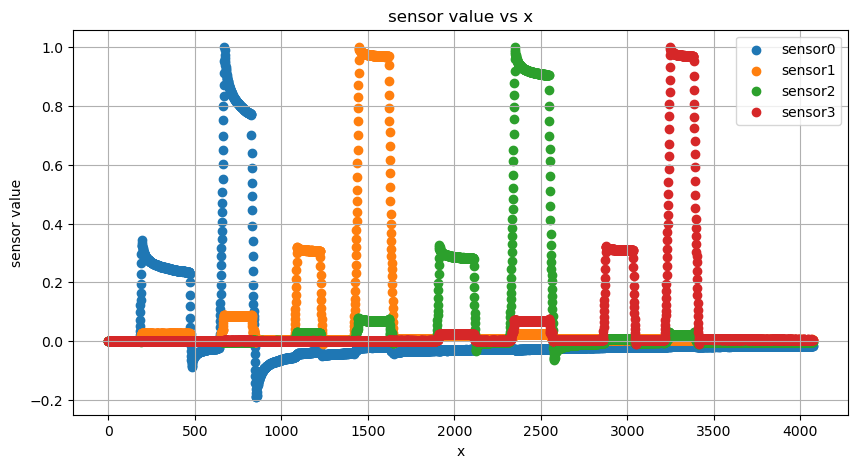

In [14]:
# Plot the data
plt.figure(figsize=(10,5))
plt.scatter(df_t0.index, df_t0['Sensor_0'], label='sensor0')
plt.scatter(df_t0.index, df_t0['Sensor_1'], label='sensor1')
plt.scatter(df_t0.index, df_t0['Sensor_2'], label='sensor2')
plt.scatter(df_t0.index, df_t0['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('x')
plt.ylabel('sensor value')
plt.title('sensor value vs x')
plt.grid(True)
plt.show()

## X-axis

### Preparation

(16917, 7)


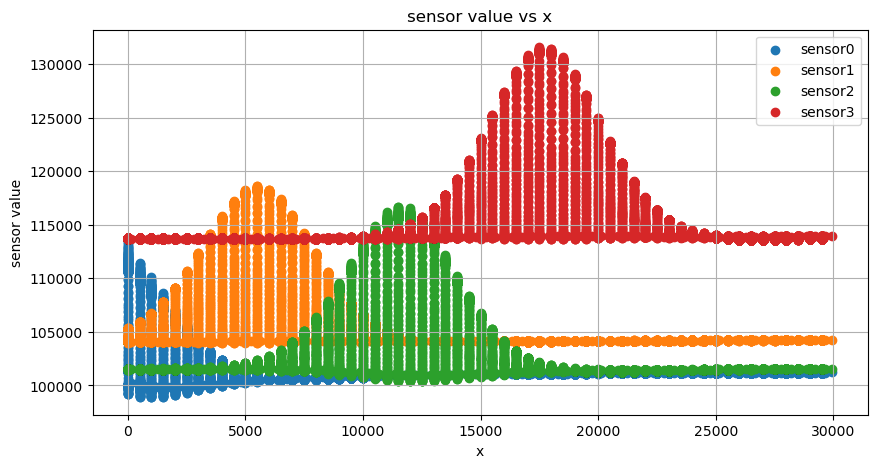

In [15]:
df_t0 = pd.read_csv('../tip1\\test_full_20230706_175400.csv')
# df_t0 = pd.read_csv('../tip1\zv1_zd5_t8_20230622_181736.csv')

print(df_t0.shape)

# Plot the data
plt.figure(figsize=(10,5))
plt.scatter(df_t0['x'], df_t0['Sensor_0'], label='sensor0')
plt.scatter(df_t0['x'], df_t0['Sensor_1'], label='sensor1')
plt.scatter(df_t0['x'], df_t0['Sensor_2'], label='sensor2')
plt.scatter(df_t0['x'], df_t0['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('x')
plt.ylabel('sensor value')
plt.title('sensor value vs x')
plt.grid(True)
plt.show()

In [69]:
# # Minus the offset for first 4 collumns based on the average reading of the first 100 rows
# print(df_t0['Sensor_0'].iloc[:100].mean())
# print(df_t0['Sensor_1'].iloc[:100].mean())
# print(df_t0['Sensor_2'].iloc[:100].mean())
# print(df_t0['Sensor_3'].iloc[:100].mean())


# df_t0['Sensor_0'] = df_t0['Sensor_0'] - df_t0['Sensor_0'].iloc[:100].mean()
# df_t0['Sensor_1'] = df_t0['Sensor_1'] - df_t0['Sensor_1'].iloc[:100].mean()
# df_t0['Sensor_2'] = df_t0['Sensor_2'] - df_t0['Sensor_2'].iloc[:100].mean()
# df_t0['Sensor_3'] = df_t0['Sensor_3'] - df_t0['Sensor_3'].iloc[:100].mean()




101133.5975
103823.5075
101344.055
113462.7925


In [16]:
df_t0['Sensor_0'] = df_t0['Sensor_0'] - mean[0]
df_t0['Sensor_1'] = df_t0['Sensor_1'] - mean[1]
df_t0['Sensor_2'] = df_t0['Sensor_2'] - mean[2]
df_t0['Sensor_3'] = df_t0['Sensor_3'] - mean[3]

# Calibrate the sensor reading by devided the max value of each sensor
df_t0['Sensor_0'] = df_t0['Sensor_0'] / (max[0] - mean[0])
df_t0['Sensor_1'] = df_t0['Sensor_1'] / (max[1] - mean[1])
df_t0['Sensor_2'] = df_t0['Sensor_2'] / (max[2] - mean[2])
df_t0['Sensor_3'] = df_t0['Sensor_3'] / (max[3] - mean[3])

In [17]:
# # delete the row with x != multiple of 1000
# df_t0 = df_t0[df_t0['x'] % 1000 == 0]

# Only remain the data with x is between 5000 and 11000
df_t0 = df_t0[df_t0['x'] >= 0]
df_t0 = df_t0[df_t0['x'] <= 18000]

# devide the 'x' by 1000
df_t0['x'] = df_t0['x'] / 1000

# # Remain the data, which z is the maximum value for fixed x
# df_t0 = df_t0.groupby('x').max()

# Remain the data, which z greater than 2000
df_t0 = df_t0[df_t0['z'] > 1000]




In [18]:
df_t0

,Sensor_0,Sensor_1,Sensor_2,Sensor_3,x,z,time
494,0.005713,-0.014004,-0.002310,-0.014566,0.0,1008,20.290804
495,0.005542,-0.014372,-0.003182,-0.014580,0.0,1038,20.353951
496,0.005521,-0.013742,-0.002859,-0.014467,0.0,1068,20.415721
497,0.013244,-0.013532,-0.002827,-0.014735,0.0,1092,20.469060
498,0.025802,-0.013130,-0.002714,-0.014340,0.0,1122,20.529717
...,...,...,...,...,...,...,...
10565,-0.015060,-0.008357,-0.019129,0.026457,18.0,1116,617.944046
10566,-0.014975,-0.008217,-0.020211,0.013464,18.0,1086,618.006182
10567,-0.014333,-0.008304,-0.019112,0.001048,18.0,1062,618.061660
10568,-0.015018,-0.008164,-0.018321,-0.006660,18.0,1032,618.121743


### Visualization

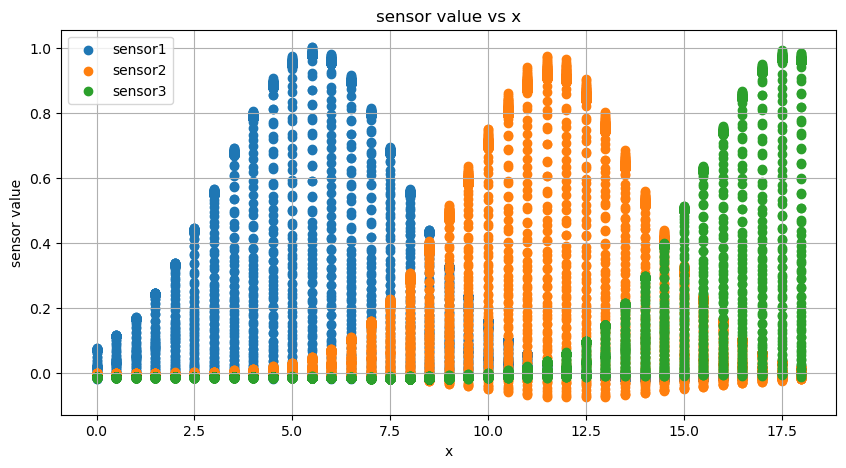

In [20]:
# Plot the data
plt.figure(figsize=(10,5))
# plt.scatter(df_t0['x'], df_t0['Sensor_0'], label='sensor0')
plt.scatter(df_t0['x'], df_t0['Sensor_1'], label='sensor1')
plt.scatter(df_t0['x'], df_t0['Sensor_2'], label='sensor2')
plt.scatter(df_t0['x'], df_t0['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('x')
plt.ylabel('sensor value')
plt.title('sensor value vs x')
plt.grid(True)
plt.show()

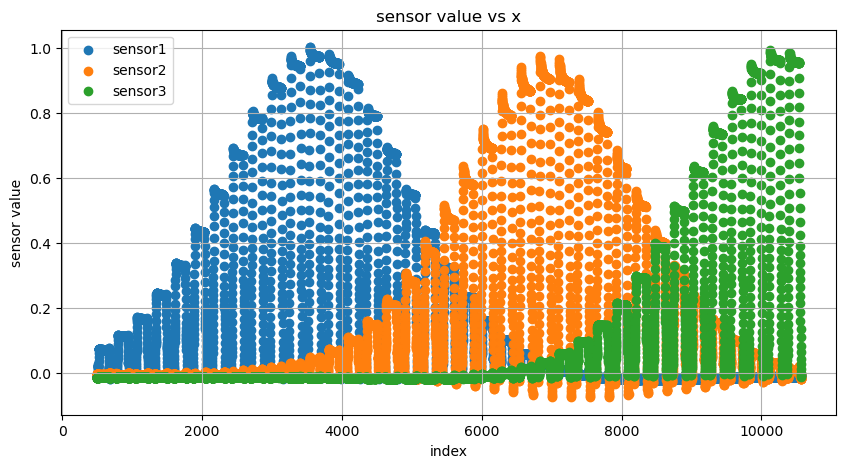

In [23]:
# Plot the data
plt.figure(figsize=(10,5))
# plt.scatter(df_t0.index, df_t0['Sensor_0'], label='sensor0')
plt.scatter(df_t0.index, df_t0['Sensor_1'], label='sensor1')
plt.scatter(df_t0.index, df_t0['Sensor_2'], label='sensor2')
plt.scatter(df_t0.index, df_t0['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('index')
plt.ylabel('sensor value')
plt.title('sensor value vs x')
plt.grid(True)
plt.show()

### Training

In [24]:
X = df_t0[[ 'Sensor_0', 'Sensor_1', 'Sensor_2', 'Sensor_3']].iloc[:, :].values
y = df_t0['x'].values

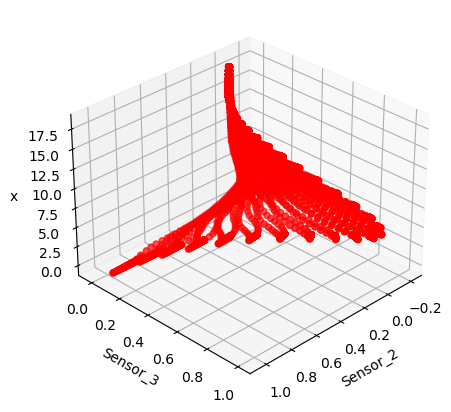

In [25]:
# plot the data in a 3d plot

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o')
ax.set_xlabel('Sensor_2')
ax.set_ylabel('Sensor_3')
ax.set_zlabel('x')

# Change the angle of the plot
ax.view_init(azim=45)

plt.show()


In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a pipeline for polynomial regression
model = make_pipeline(PolynomialFeatures(degree=7), LinearRegression())

# Train the model
model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model.predict(X_test)

# # Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

# Calculate the mean squared error for training and test sets
mse_train = mean_squared_error(y_train, model.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)
print(f"Mean squared error for training set: {mse_train}")
print(f"Mean squared error for test set: {mse_test}")


R-squared score: 0.97875859590832
Mean squared error for training set: 0.6440884156734071
Mean squared error for test set: 0.6183502426657091


Text(0.5, 0, 'x')

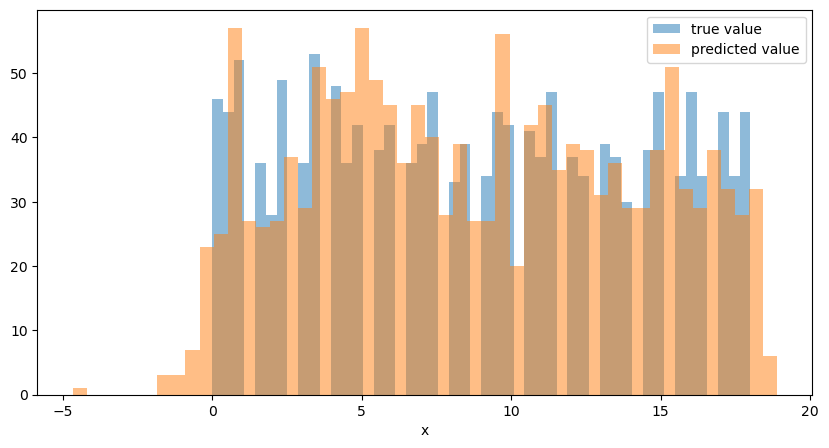

In [27]:
# plot the distribution of data
plt.figure(figsize=(10,5))
plt.hist(y_test, bins=50, alpha=0.5, label='true value')
plt.hist(y_pred, bins=50, alpha=0.5, label='predicted value')
plt.legend()
plt.xlabel('x')


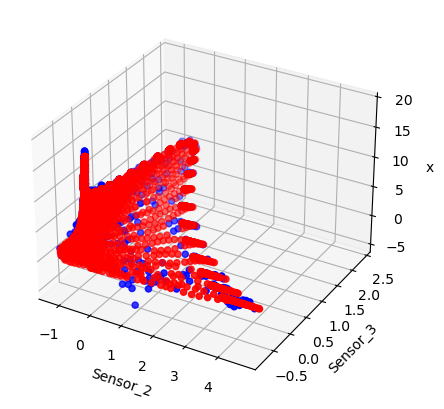

In [28]:
# Plot the results in 3d
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='r', marker='o')
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='b', marker='o')
ax.set_xlabel('Sensor_2')
ax.set_ylabel('Sensor_3')
ax.set_zlabel('x')
plt.show()





In [29]:
# Print the predicted values and the actual values one by one
for i in range(len(y_pred)):
    print(f"Predicted value: {y_pred[i]:.2f}, Actual value: {y_test[i]:.2f}")



Predicted value: 1.48, Actual value: 1.50
Predicted value: 15.92, Actual value: 16.00
Predicted value: 18.02, Actual value: 18.00
Predicted value: 18.08, Actual value: 18.00
Predicted value: 5.51, Actual value: 5.50
Predicted value: 0.96, Actual value: 1.00
Predicted value: 1.57, Actual value: 1.50
Predicted value: 5.46, Actual value: 5.50
Predicted value: 14.06, Actual value: 13.50
Predicted value: 4.02, Actual value: 4.00
Predicted value: 2.47, Actual value: 2.50
Predicted value: 0.62, Actual value: 2.00
Predicted value: 2.46, Actual value: 2.50
Predicted value: 17.07, Actual value: 17.00
Predicted value: 3.05, Actual value: 3.00
Predicted value: 10.41, Actual value: 10.50
Predicted value: 0.75, Actual value: 0.50
Predicted value: 18.49, Actual value: 17.50
Predicted value: -0.01, Actual value: 0.00
Predicted value: 18.08, Actual value: 18.00
Predicted value: 11.12, Actual value: 11.00
Predicted value: 10.35, Actual value: 10.00
Predicted value: 6.95, Actual value: 7.00
Predicted val

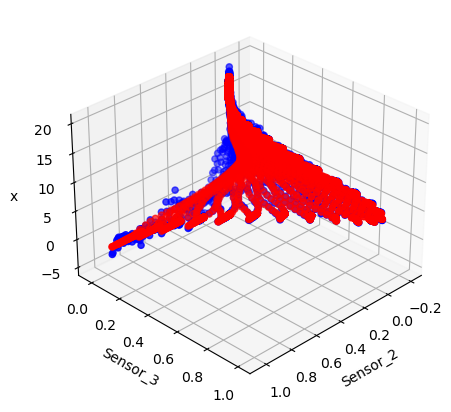

In [30]:
# Plot the results, the predicted values for all the data
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o')
ax.scatter(X[:, 0], X[:, 1], model.predict(scaler.transform(X)), c='b', marker='o')
ax.set_xlabel('Sensor_2')
ax.set_ylabel('Sensor_3')
ax.set_zlabel('x')

# Change the angle of the plot
ax.view_init(azim=45)
plt.show()


In [59]:
# Test the input, x = 3677.3125, 51.5725, 4088.3125	58.5725
new_input = [[3677,3677.3125,51]]
new_input = scaler.transform(new_input)
new_output = model.predict(new_input)
print(f"Predicted output: {new_output}")

ValueError: X has 3 features, but StandardScaler is expecting 4 features as input.

In [31]:
# Show the regression coefficients
print(f"Regression coefficients: {model.named_steps['linearregression'].coef_}")

# Show the regression intercept
print(f"Regression intercept: {model.named_steps['linearregression'].intercept_}")

# Show the regressino formula, degree = 2
print(f"Regression formula: y = {model.named_steps['linearregression'].intercept_} + {model.named_steps['linearregression'].coef_[0]}*x1 + {model.named_steps['linearregression'].coef_[1]}*x2 + {model.named_steps['linearregression'].coef_[2]}*x3 + {model.named_steps['linearregression'].coef_[3]}*x1^2 + {model.named_steps['linearregression'].coef_[4]}*x1*x2 + {model.named_steps['linearregression'].coef_[5]}*x1*x3 + {model.named_steps['linearregression'].coef_[6]}*x2^2 + {model.named_steps['linearregression'].coef_[7]}*x2*x3 + {model.named_steps['linearregression'].coef_[8]}*x3^2")

Regression coefficients: [ 1.03893940e+02 -2.41772471e+05 -1.01072393e+05 -1.23611038e+05
 -1.77783831e+05  1.07824068e+05 -5.03821211e+05 -4.01695276e+05
 -7.76861426e+05 -6.56126392e+04 -2.82832536e+05 -3.67481614e+05
 -1.09299951e+05 -3.83455624e+05 -9.67927954e+04  8.38932689e+05
  1.24231873e+05  1.55473915e+05  1.26740530e+06 -4.55094304e+05
 -1.00562670e+06 -2.14884893e+06 -4.28620066e+05 -9.00269177e+05
 -3.94592292e+05 -1.74722349e+04 -1.49017856e+05 -2.89139015e+05
 -2.74278517e+05 -9.62107389e+05 -3.76697127e+05 -5.27489243e+04
 -3.42237192e+05 -2.20585903e+05  8.09730655e+04  1.46272301e+05
  1.27523529e+06  7.75121033e+05  4.56012775e+06 -3.91721444e+05
 -3.55497578e+05  1.19374793e+06 -4.18203752e+05  2.23023572e+06
  3.75761613e+06 -4.68967172e+04 -4.02736634e+05 -2.38231168e+06
 -9.81951930e+05 -3.10430284e+06 -3.18166186e+06 -2.50181297e+05
 -1.09600981e+06  3.51810491e+05  5.05362061e+05 -1.71962601e+04
 -3.88389139e+04 -8.37346260e+04 -1.76139196e+05 -5.24906802e+05


## Z-axis

### Preparation

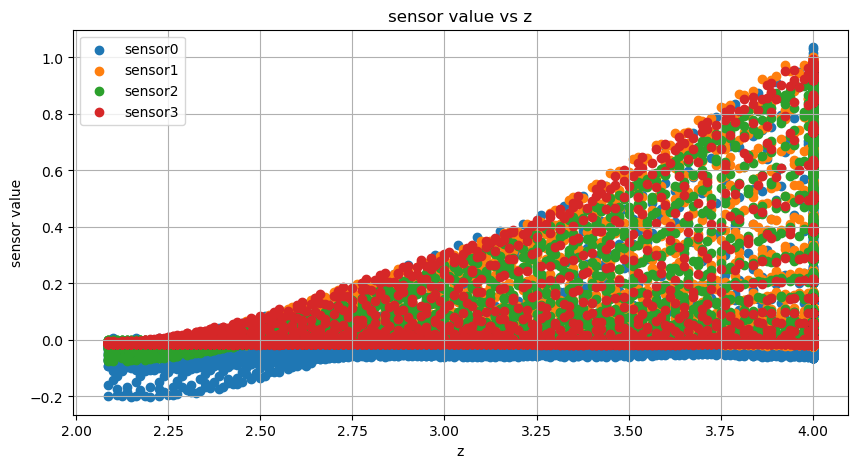

In [32]:
# z devided by 480 steps/mm
df_t0['z'] = df_t0['z']/480

# Plot the data
plt.figure(figsize=(10,5))
plt.scatter(df_t0['z'], df_t0['Sensor_0'], label='sensor0')
plt.scatter(df_t0['z'], df_t0['Sensor_1'], label='sensor1')
plt.scatter(df_t0['z'], df_t0['Sensor_2'], label='sensor2')
plt.scatter(df_t0['z'], df_t0['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('z')
plt.ylabel('sensor value')
plt.title('sensor value vs z')
plt.grid(True)
plt.show()

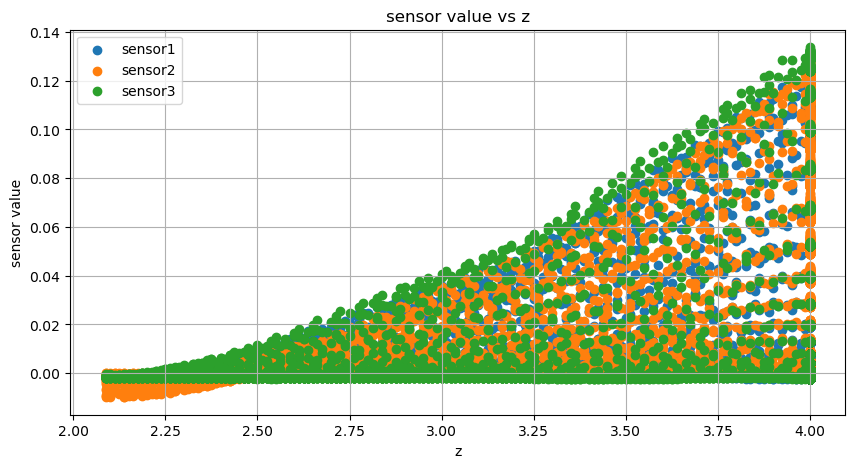

In [61]:
# Plot the data
plt.figure(figsize=(10,5))
# plt.scatter(df_t0['x'], df_t0['Sensor_0'], label='sensor0')
plt.scatter(df_t0['z'], df_t0['Sensor_1'], label='sensor1')
plt.scatter(df_t0['z'], df_t0['Sensor_2'], label='sensor2')
plt.scatter(df_t0['z'], df_t0['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('z')
plt.ylabel('sensor value')
plt.title('sensor value vs z')
plt.grid(True)
plt.show()

### Training

In [33]:
X = df_t0[['Sensor_0', 'Sensor_1','Sensor_2', 'Sensor_3']].iloc[:, :].values
y = df_t0['z'].values

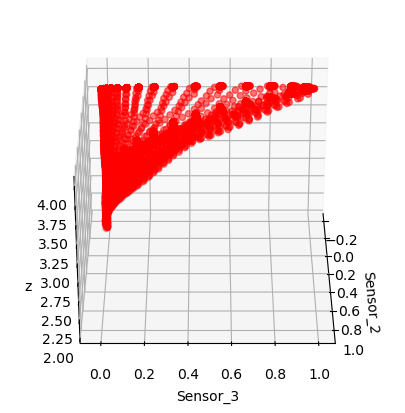

In [34]:
# plot the data in a 3d plot

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o')
ax.set_xlabel('Sensor_2')
ax.set_ylabel('Sensor_3')
ax.set_zlabel('z')

# Change the angle of the plot
ax.view_init(azim=0)

plt.show()

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a pipeline for polynomial regression
model_z = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Train the model
model_z.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model_z.predict(X_test)

# # Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

# Calculate the mean squared error for training and test sets
mse_train = mean_squared_error(y_train, model_z.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)
print(f"Mean squared error for training set: {mse_train}")
print(f"Mean squared error for test set: {mse_test}")


R-squared score: 0.9853942171863104
Mean squared error for training set: 0.004097909222811881
Mean squared error for test set: 0.004452373449523289


In [36]:
# Print the predicted values and the actual values one by one
for i in range(len(y_pred)):
    print(f"Predicted value: {y_pred[i]:.2f}, Actual value: {y_test[i]:.2f}")



Predicted value: 3.97, Actual value: 4.00
Predicted value: 4.02, Actual value: 4.00
Predicted value: 3.94, Actual value: 4.00
Predicted value: 3.92, Actual value: 4.00
Predicted value: 3.97, Actual value: 4.00
Predicted value: 4.03, Actual value: 4.00
Predicted value: 3.97, Actual value: 4.00
Predicted value: 3.98, Actual value: 4.00
Predicted value: 2.85, Actual value: 2.85
Predicted value: 4.00, Actual value: 4.00
Predicted value: 3.97, Actual value: 4.00
Predicted value: 2.01, Actual value: 2.24
Predicted value: 3.17, Actual value: 3.30
Predicted value: 3.41, Actual value: 3.40
Predicted value: 3.98, Actual value: 4.00
Predicted value: 3.98, Actual value: 4.00
Predicted value: 3.97, Actual value: 4.00
Predicted value: 2.55, Actual value: 2.42
Predicted value: 3.94, Actual value: 3.91
Predicted value: 3.95, Actual value: 4.00
Predicted value: 3.99, Actual value: 4.00
Predicted value: 4.01, Actual value: 4.00
Predicted value: 4.02, Actual value: 4.00
Predicted value: 3.70, Actual valu

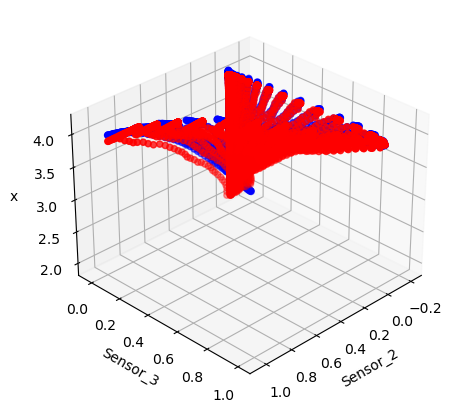

In [37]:
# Plot the results, the predicted values for all the data
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o')
ax.scatter(X[:, 0], X[:, 1], model_z.predict(scaler.transform(X)), c='b', marker='o')
ax.set_xlabel('Sensor_2')
ax.set_ylabel('Sensor_3')
ax.set_zlabel('x')

# Change the angle of the plot
ax.view_init(azim=45)
plt.show()


In [38]:
# Test the input, x = 3677.3125, 51.5725, 4088.3125	58.5725
new_input = [[11800, 11800.5625,106.8225]]
new_input = scaler.transform(new_input)
new_output = model_z.predict(new_input)
print(f"Predicted output: {new_output}")

ValueError: X has 3 features, but StandardScaler is expecting 4 features as input.

## Model Combination

In [39]:
# Combine the models, make pridictionn for all the data in the dataframe
df_t0['z_pred'] = model_z.predict(scaler.transform(df_t0[['Sensor_0','Sensor_1','Sensor_2', 'Sensor_3']]))
df_t0['x_pred'] = model.predict(scaler.transform(df_t0[['Sensor_0','Sensor_1','Sensor_2', 'Sensor_3']]))

c:\Users\59784\.conda\envs\data\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
c:\Users\59784\.conda\envs\data\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


c:\Users\59784\.conda\envs\data\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


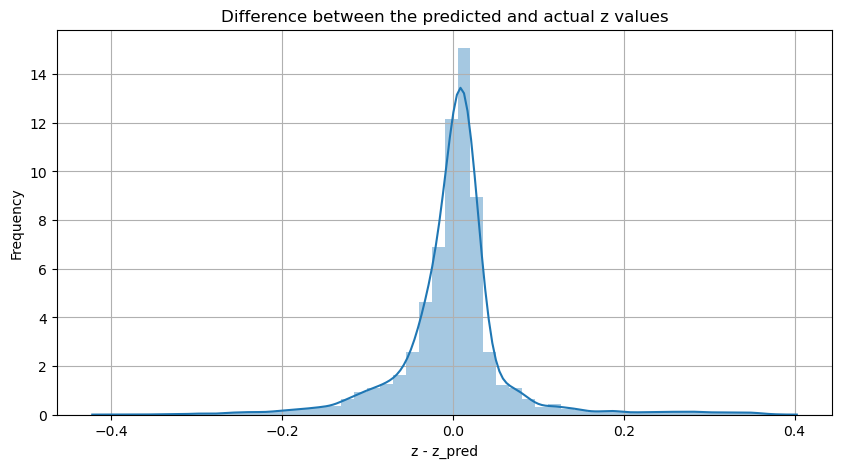

In [40]:
# Plot the difference between the predicted and actual values in a distribution plot
plt.figure(figsize=(10,5))
sns.distplot(df_t0['z'] - df_t0['z_pred'], bins=50)
plt.xlabel('z - z_pred')
plt.ylabel('Frequency')
plt.title('Difference between the predicted and actual z values')
plt.grid(True)
plt.show()



c:\Users\59784\.conda\envs\data\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


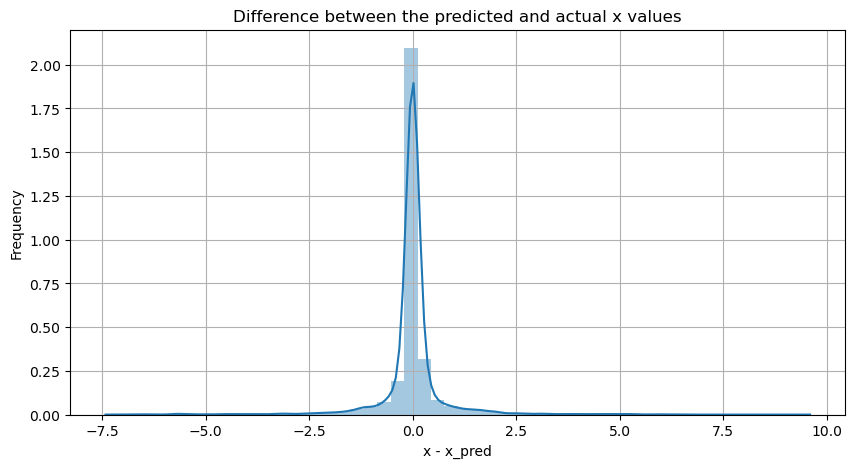

In [41]:
# Plot the difference between the predicted and actual values in a distribution plot
plt.figure(figsize=(10,5))
sns.distplot(df_t0['x'] - df_t0['x_pred'], bins=50)
plt.xlabel('x - x_pred')
plt.ylabel('Frequency')
plt.title('Difference between the predicted and actual x values')
plt.grid(True)
plt.show()


### Additional Plots

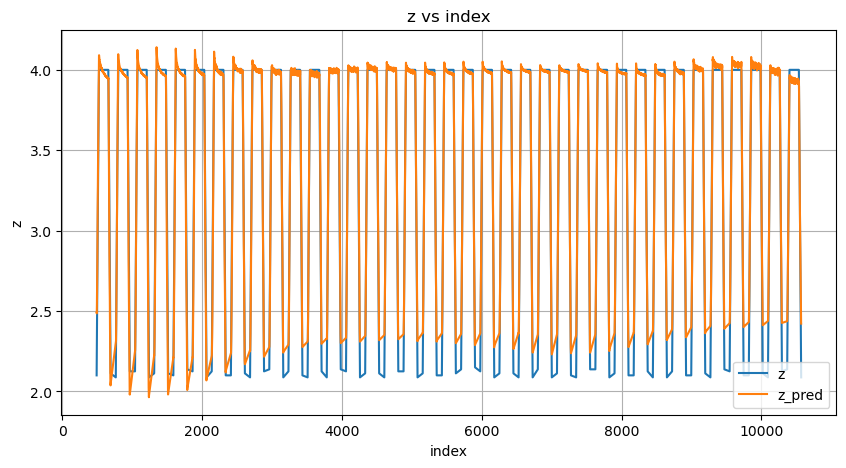

In [42]:
# Plot the results in 2d z and vs index
plt.figure(figsize=(10,5))
plt.plot(df_t0.index, df_t0['z'], label='z')
plt.plot(df_t0.index, df_t0['z_pred'], label='z_pred')
plt.legend()
plt.xlabel('index')
plt.ylabel('z')
plt.title('z vs index')
plt.grid(True)
plt.show()


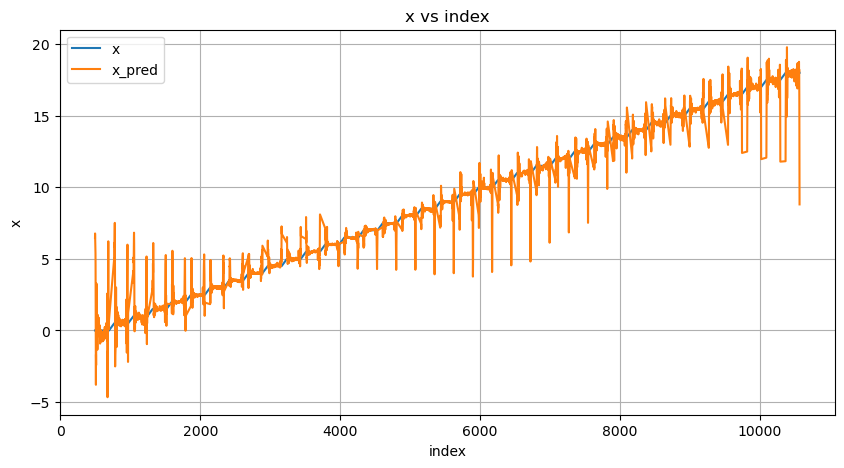

In [43]:
# Plot the results in 2d x and vs index
plt.figure(figsize=(10,5))
plt.plot(df_t0.index, df_t0['x'], label='x')
plt.plot(df_t0.index, df_t0['x_pred'], label='x_pred')
plt.legend()
plt.xlabel('index')
plt.ylabel('x')
plt.title('x vs index')
plt.grid(True)
plt.show()


## Model performance - Out-of-sample

(11980, 7)


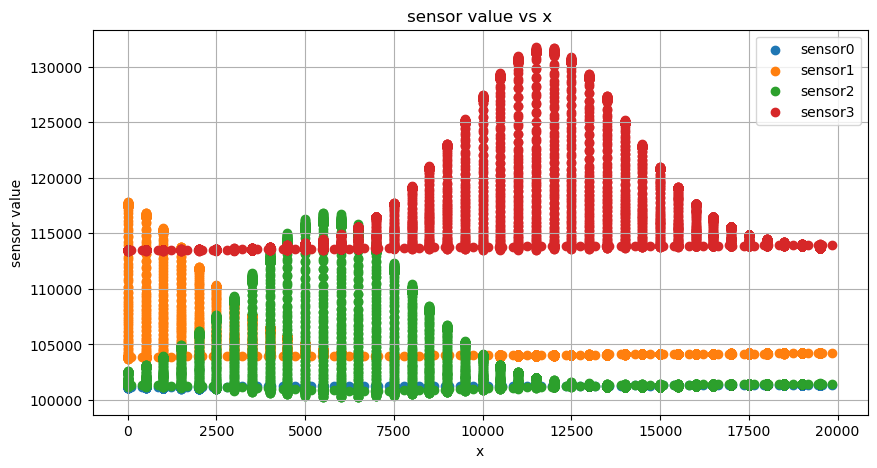

In [44]:
# Test the out-of-sample data
df_t1 = pd.read_csv('../tip1/test_20230706_170139.csv')
# df_t1 = pd.read_csv('../tip1\zv1_zd6_t0_20230622_180037.csv')


print(df_t1.shape)

# Plot the data
plt.figure(figsize=(10,5))
plt.scatter(df_t1['x'], df_t1['Sensor_0'], label='sensor0')
plt.scatter(df_t1['x'], df_t1['Sensor_1'], label='sensor1')
plt.scatter(df_t1['x'], df_t1['Sensor_2'], label='sensor2')
plt.scatter(df_t1['x'], df_t1['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('x')
plt.ylabel('sensor value')
plt.title('sensor value vs x')
plt.grid(True)
plt.show()
# Same preprocessing as for the training data


In [45]:
# Minus the offset for first 4 collumns based on the average reading of the first 100 rows
print(df_t1['Sensor_0'].iloc[:100].mean())
print(df_t1['Sensor_1'].iloc[:100].mean())
print(df_t1['Sensor_2'].iloc[:100].mean())
print(df_t1['Sensor_3'].iloc[:100].mean())


df_t1['Sensor_0'] = df_t1['Sensor_0'] - df_t1['Sensor_0'].iloc[:100].mean()
df_t1['Sensor_1'] = df_t1['Sensor_1'] - df_t1['Sensor_1'].iloc[:100].mean()
df_t1['Sensor_2'] = df_t1['Sensor_2'] - df_t1['Sensor_2'].iloc[:100].mean()
df_t1['Sensor_3'] = df_t1['Sensor_3'] - df_t1['Sensor_3'].iloc[:100].mean()

# # delete the row with x != multiple of 1000
# df_t1 = df_t1[df_t1['x'] % 1000 == 0]

# Only remain the data with x is between 5000 and 11000
df_t1 = df_t1[df_t1['x'] >= 6000]
df_t1 = df_t1[df_t1['x'] <= 12000]

# devide the 'x' by 1000
df_t1['x'] = df_t1['x'] / 1000

# # Remain the data, which z is the maximum value for fixed x
# df_t0 = df_t0.groupby('x').max()

# Remain the data, which z greater than 2000
df_t1 = df_t1[df_t1['z'] > 1000]

df_t1['z'] = df_t1['z']/480




101133.5975
103823.5075
101344.055
113462.7925


### Visualization

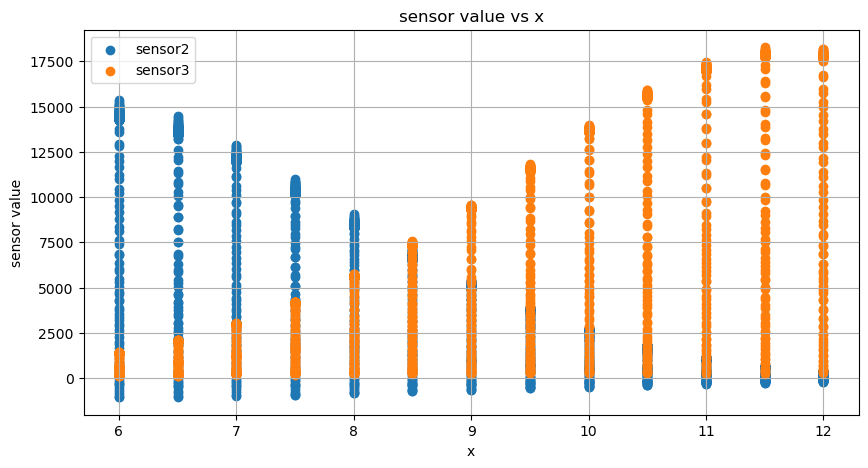

In [46]:
# Plot the data
plt.figure(figsize=(10,5))
# plt.scatter(df_t0['x'], df_t0['Sensor_0'], label='sensor0')
# plt.scatter(df_t0['x'], df_t0['Sensor_1'], label='sensor1')
plt.scatter(df_t1['x'], df_t1['Sensor_2'], label='sensor2')
plt.scatter(df_t1['x'], df_t1['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('x')
plt.ylabel('sensor value')
plt.title('sensor value vs x')
plt.grid(True)
plt.show()

### Test

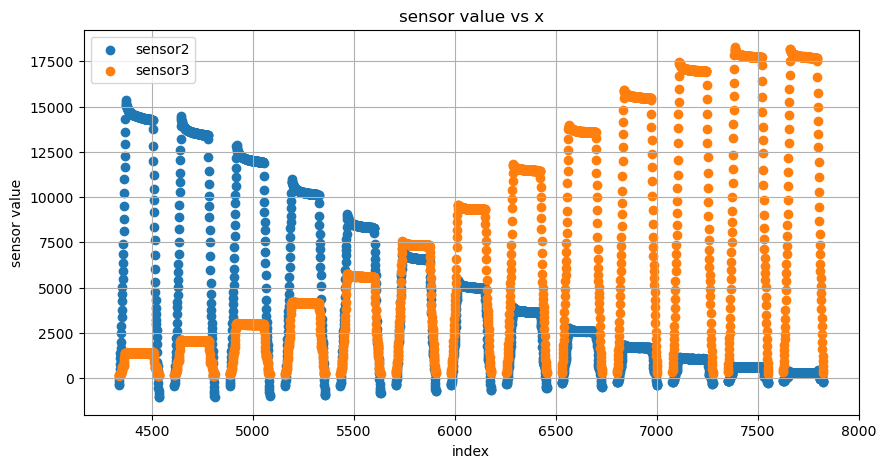

In [47]:
# Plot the data
plt.figure(figsize=(10,5))
# plt.scatter(df_t0['x'], df_t0['Sensor_0'], label='sensor0')
# plt.scatter(df_t0.index, df_t0['Sensor_1'], label='sensor1')
plt.scatter(df_t1.index, df_t1['Sensor_2'], label='sensor2')
plt.scatter(df_t1.index, df_t1['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('index')
plt.ylabel('sensor value')
plt.title('sensor value vs x')
plt.grid(True)
plt.show()

In [48]:
X_out = df_t1[[ 'Sensor_2', 'Sensor_3']].iloc[:, :].values
y_out_x = df_t1['x'].values
y_out_z = df_t1['z'].values


In [49]:
# test the model
y_out_pred_x = model.predict(scaler.transform(X_out))
y_out_pred_z = model_z.predict(scaler.transform(X_out))

# Calculate the mean squared error for training and test sets
mse_test = mean_squared_error(y_out_x, y_out_pred_x)
mse_test_z = mean_squared_error(y_out_z, y_out_pred_z)
print(f"Mean squared error for test set (x): {mse_test}")
print(f"Mean squared error for test set (z): {mse_test_z}")


ValueError: X has 2 features, but StandardScaler is expecting 4 features as input.

In [59]:
df_t1['z_pred'] = model_z.predict(scaler.transform(df_t1[['Sensor_2', 'Sensor_3']]))
df_t1['x_pred'] = model.predict(scaler.transform(df_t1[['Sensor_2', 'Sensor_3']]))

c:\Users\59784\.conda\envs\data\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
c:\Users\59784\.conda\envs\data\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


c:\Users\59784\.conda\envs\data\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


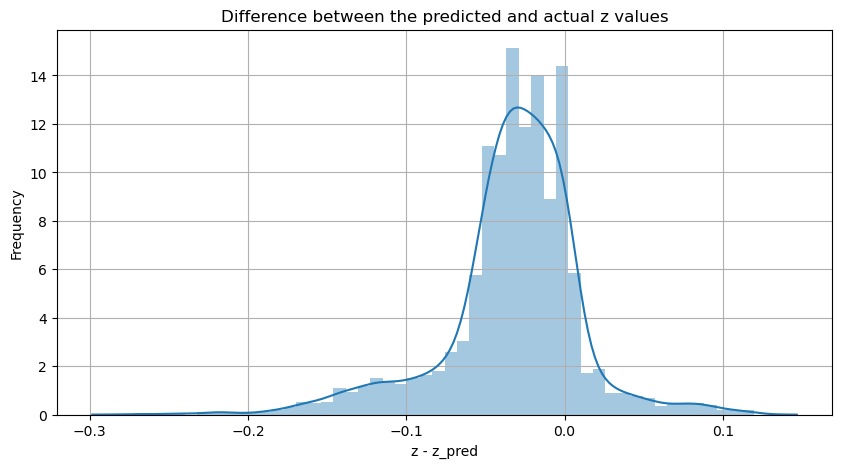

In [60]:
# Plot the difference between the predicted and actual values in a distribution plot
plt.figure(figsize=(10,5))
sns.distplot(df_t1['z'] - df_t1['z_pred'], bins=50)
plt.xlabel('z - z_pred')
plt.ylabel('Frequency')
plt.title('Difference between the predicted and actual z values')
plt.grid(True)
plt.show()



c:\Users\59784\.conda\envs\data\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


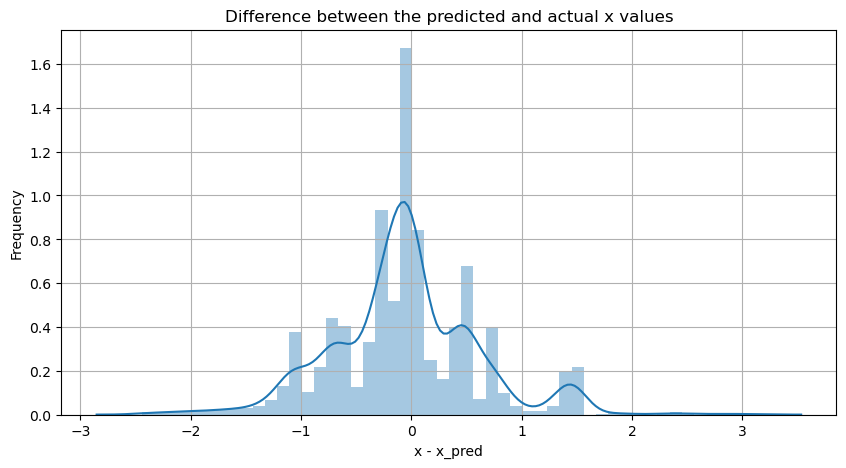

In [61]:
# Plot the difference between the predicted and actual values in a distribution plot
plt.figure(figsize=(10,5))
sns.distplot(df_t1['x'] - df_t1['x_pred'], bins=50)
plt.xlabel('x - x_pred')
plt.ylabel('Frequency')
plt.title('Difference between the predicted and actual x values')
plt.grid(True)
plt.show()
